## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

## Importing the dataset

In [ ]:
dataset = pd.read_csv("Mall_Customers.csv")
# there is no dependent variable apriori(before we create it) while doing clustering
X = dataset.iloc[:, [3,4]].values  #matrix of features 
# [] used to reference the columns with their indexes instead of using a range

In [ ]:
print(X)

## Using the elbow method to find the optimal number of clusters

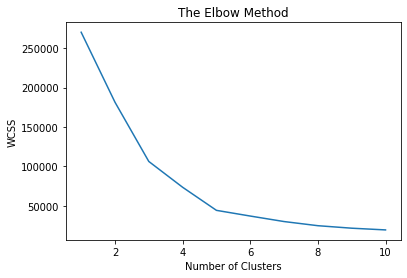

In [ ]:
#run the k-means algorithm several times
from sklearn.cluster import KMeans  #from module import class
wcss = [] 
for itr in range(1,11):
  kmeans = KMeans(n_clusters = itr, init = 'k-means++', random_state = 42)  # object of the class  # 42 is a number that brings luck in mathematics
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)  #inertia_ is an attribute of our kmeans object, attribute can give us directly a value we want

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#we choose 5 as our number of clusters
# We build, train and run the kmeans algorithm to identify 5 clusters

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) 
kmeans.fit(X)

 
#each cluster will be a group of customers(the DV(y) will be split through the mall_customers values categorizing them into the 5 different clusters)


KMeans(n_clusters=5, random_state=42)

In [ ]:
y_kmeans = kmeans.predict(X)

In [ ]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters using a scallet plot




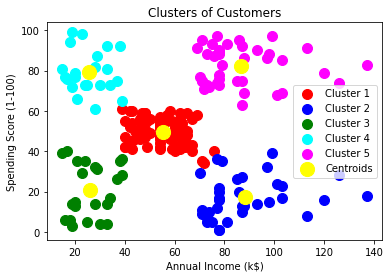

In [ ]:
clr = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
  plt.scatter(X[y_kmeans == i,0], X[y_kmeans == i,1], s = 100, c = clr[i], label = 'Cluster '+str(i+1))   
  #X[] = rows where y_kmeans is 0,and the 1st column in X
  #(x-coordinates, y-coordinates)
  #s = size, c = color
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()